In [2]:
import cv2
import os
import h5py
import numpy as np
folder_path = r"C:\Users\accer\Desktop\Assignment#4\Dogs"
output_folder_path = r"C:\Users\accer\Desktop\Assignment#4\Resized_Dogs"

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)    
        if image is not None:
            # Resize the image to a desired size (e.g., 64x64)
            resized_image = cv2.resize(image, (64, 64))

            # Save the resized image to the output folder
            output_path = os.path.join(output_folder_path, filename)
            cv2.imwrite(output_path, resized_image)
        else:
            print("Failed to read the image:", image_path)

#convert into list
image1 = []

directory =r"C:\Users\accer\Desktop\Assignment#4\Resized_Dogs"
labels= []
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if "dog" in filename:
                label = 1  # Dog category
            else:
                label = 0  # Not dog category

            image1.append(image)
            labels.append(label)
            
        else:

            print("Failed to read the image:", image_path)            
            
            
# create file for trainning dataset
train_images = image1
train_labels = labels

with h5py.File("train_dogsnondogs.h5", "w") as hf:
    train_set_x = hf.create_dataset("train_set_x", data=train_images)
    train_set_y = hf.create_dataset("train_set_y", data=train_labels)
    
    
#Now same procedure for testing data set
folder_path_test = r"C:\Users\accer\Desktop\Assignment#4\test_dogs"
output_folder_path_test = r"C:\Users\accer\Desktop\Assignment#4\Test_Resized_Dogs"

os.makedirs(output_folder_path_test, exist_ok=True)

for filename in os.listdir(folder_path_test):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(folder_path_test, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            # Resize the image to a desired size (e.g., 64x64)
            resized_image = cv2.resize(image, (64, 64))
            
            # Save the resized image to the output folder
            output_path = os.path.join(output_folder_path_test, filename)
            cv2.imwrite(output_path, resized_image)
        else:
            print("Failed to read the image:", image_path)
            
#Convert testing dataset into list
image2 = []
directory_test =r"C:\Users\accer\Desktop\Assignment#4\Test_Resized_Dogs"
labels2= []
for filename in os.listdir(directory_test):
    if filename.endswith(".jpg"):
        image_path = os.path.join(directory_test, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if "dog" in filename:
                label2 = 1  # Dog category
            else:
                label2 = 0  # Not dog category

            image2.append(image)
            labels2.append(label2)
            
        else:

            print("Failed to read the image:", image_path) 
            
#Create hdf5 file for trainning dataset             
test_images = image2
test_labels = labels2
 
with h5py.File("test_dogsnondogs.h5", "w") as hf:
    test_set_x = hf.create_dataset("test_set_x", data=test_images)
    test_set_y = hf.create_dataset("test_set_y", data=test_labels)            

classes = np.unique(labels + labels2)

# Print the list of classes
print("Classes:", classes)     

Classes: [0 1]


y = [1], it's a 'Dog' picture.


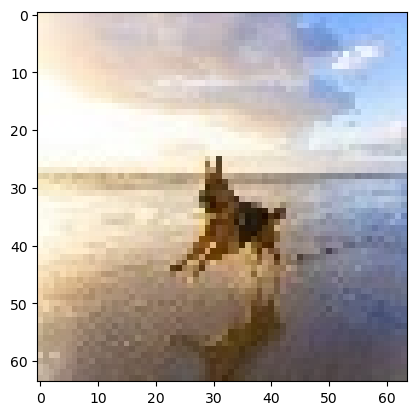

In [21]:
def load_dataset():
    train_dataset = h5py.File('train_dogsnondogs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_dogsnondogs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(['Not Dog', 'Dog']) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
index = 123
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])] +  "' picture.")

# Reshaping the training and testing examples data set, with each training or testing example being in one column
# All pixels (64*64*3) will be treated as a separate features
# So, the shape of the matrix will be (64*64*3,no_of_examples)

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Feature scaling (dividing by max value)
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [24]:
# importing required packages

import numpy as np
import h5py
import matplotlib.pyplot as plt
import h5py

# defining helper functions for this network

import numpy as np

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    cache = Z 
    
    return A, cache

# initialize_parameters
def initialize_parameters(n_x, n_h, n_y):
  
    # storing random values for initial weights
    # the shape of weights[l], in general, is (n[l],n[l-1]) and of bias[l] is (n[l],1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters 

def initialize_parameters_deep(layer_dims):

    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters        

# linear_forward
def linear_forward(A, W, b):
    
    Z = np.dot(W, A) + b
    cache = (A, W, b) # we are also returning these values as they will be useful in backward propagation
    
    return Z, cache

# linear_activation_forward
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    cache = (linear_cache, activation_cache)

    return A, cache

# compute_cost
def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

def relu_backward(dA, cache):

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    return dZ

def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

# linear_backward
def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

# linear_activation_backward
def linear_activation_backward(dA, cache, activation):
 
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    # Shorten the code
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

# update_parameters
def update_parameters(parameters, grads, learning_rate):
   
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

# Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
            
    return AL, caches

# Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print accuracy
    print("Accuracy: "  + str(np.sum((p == y)/m)*100)+ " %")
        
    return p

In [25]:
# Firstly, I'll implement the neural network with 2 layers (one hidden layer)

### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 4
n_y = 1
layers_dims = (n_x, n_h, n_y)

def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
            
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        # Set grads['dW1'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6934084956399347
Cost after iteration 100: 0.689478398020911
Cost after iteration 200: 0.678139183397503
Cost after iteration 300: 0.6497089421528341
Cost after iteration 400: 0.5900050842054433
Cost after iteration 500: 0.5090912453213368
Cost after iteration 600: 0.555113272194629
Cost after iteration 700: 0.48468281669045804
Cost after iteration 800: 0.4528361428198874
Cost after iteration 900: 0.4219676211611053
Cost after iteration 1000: 0.3922683631633171
Cost after iteration 1100: 0.36320271724892483
Cost after iteration 1200: 0.3328203051490289
Cost after iteration 1300: 0.29934148125756654
Cost after iteration 1400: 0.25620404718911194
Cost after iteration 1500: 0.1130682208955732
Cost after iteration 1600: 0.07926548180080661
Cost after iteration 1700: 0.06181850674412866
Cost after iteration 1800: 0.049657110077571336
Cost after iteration 1900: 0.04086468672770368


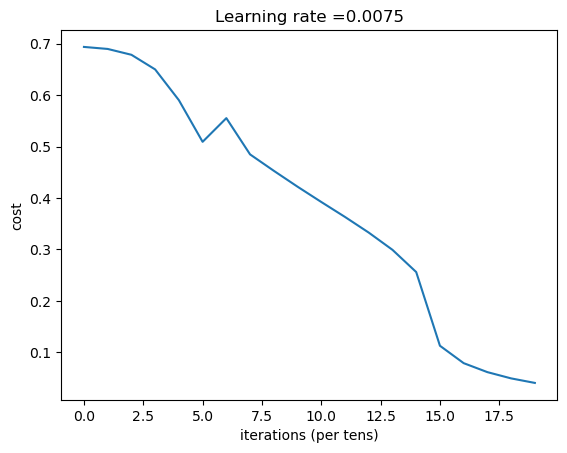

In [37]:
# calling the two-layer network for our dataset
parameters = two_layer_model(train_set_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2000, print_cost=True)

In [39]:
# Calculating the accuracy of the model on both training and testing data

print("Training Dataset")
pred_train = predict(train_set_x, train_set_y, parameters)

print("Testing Dataset")
predictions_test = predict(test_set_x, test_set_y, parameters)

Training Dataset
Accuracy: 100.00000000000003 %
Testing Dataset
Accuracy: 67.30769230769232 %


y = 0, you predicted that it is a "not-dog" picture.


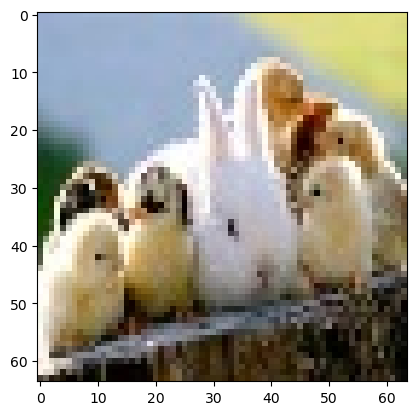

In [40]:
# testing the results of our model on a particular example

index = 12  
plt.imshow(test_set_x[:,index].reshape((64, 64, 3)))
pred_label = int(predictions_test[0,index])
pred_class = "dog"
if pred_label == 0:
    pred_class = "not-dog"
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + pred_class +  "\" picture.")

Cost after iteration 0: 0.709738
Cost after iteration 100: 0.642852
Cost after iteration 200: 0.581029
Cost after iteration 300: 0.529805
Cost after iteration 400: 0.481399
Cost after iteration 500: 0.628513
Cost after iteration 600: 0.614089
Cost after iteration 700: 0.511791
Cost after iteration 800: 0.358245
Cost after iteration 900: 0.286376
Cost after iteration 1000: 0.258910
Cost after iteration 1100: 0.263865
Cost after iteration 1200: 0.460824
Cost after iteration 1300: 0.191448
Cost after iteration 1400: 0.163763


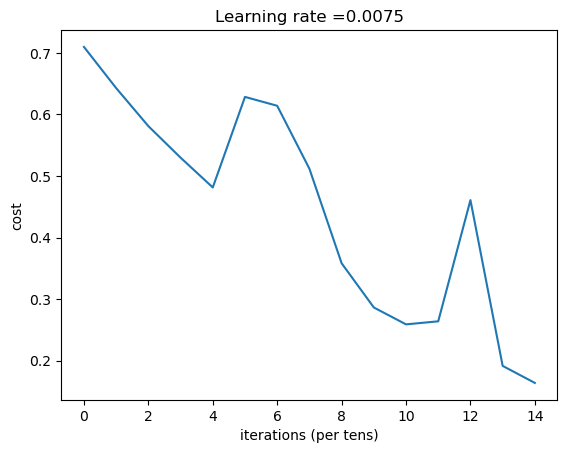

In [41]:
# Now lets implement a neural network with 4 layers

### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model (with one additional input layer)

# n_layer_model
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False): #lr was 0.009

    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
# calling this deep neural network
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations=1500, print_cost=True)

In [42]:
# calculating accuracy of training and testing data for this deep network model
print("Training Dataset")
pred_train = predict(train_set_x, train_set_y, parameters)

print("Testing Dataset")
predictions_test = predict(test_set_x, test_set_y, parameters)

Training Dataset
Accuracy: 99.33333333333336 %
Testing Dataset
Accuracy: 69.23076923076924 %


In [ ]:
#Comparing the accuracy of the two networks, one with 2 layers and the other with 4 layers, reveals that the network with more layers achieves a higher accuracy. 
#This is due to the ability of deep neural networks to learn complex patterns and generalize the dataset more effectively.
#By adjusting hyperparameters such as learning rate, number of iterations, layers, and neurons, more favorable outcomes could be obtained for specific datasets.
#In summary, increasing network depth can lead to improved accuracy, but it is crucial to address overfitting and fine-tune hyperparameters to optimize model performance.